In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

sns.set(font_scale=2)
sns.set_style("white")

In [59]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 26

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

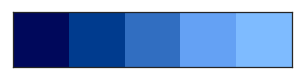

In [60]:
blueui = ["#00085B", "#003B8E", "#316EC1", "#64a1f4", "#7EBBFF"]

sns.palplot(sns.color_palette(blueui))
sns.set_palette(blueui)

In [61]:
# Specify filename
l2Fn = "/home/jenna/Research/data/sam/metrics/l2norms.csv"

# Read file into dataframe
l2Df = pd.read_csv(l2Fn, header=None)

# Print shape of dataframe
print(l2Df.shape)

(20, 151)


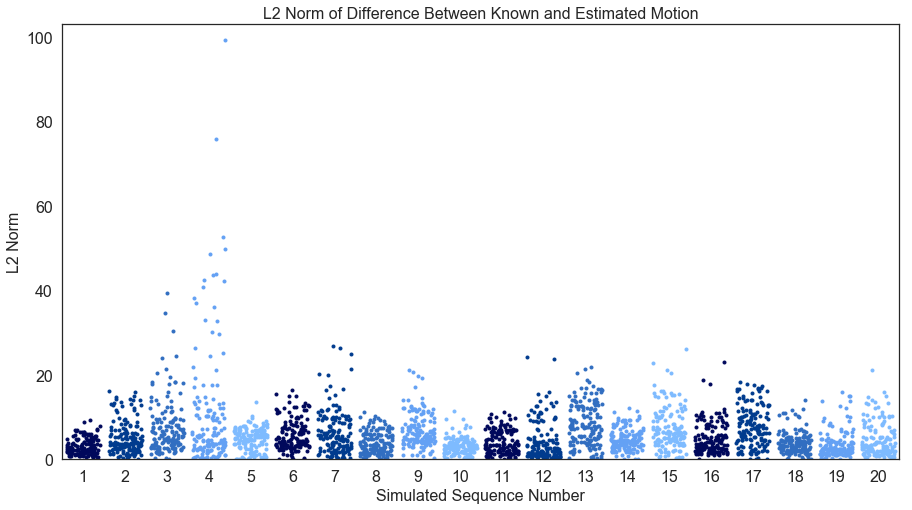

In [62]:
counter = 1
i = 1
plt.figure(figsize=(15,8))
ticks = []
labels = []

for l2Row in l2Df.iterrows():
    # Get the data as arrays
    l2 = l2Row[1].to_numpy()
    index = l2[0]
    l2 = l2[1:]
    ticks.append(index/2+.25)
    labels.append(str(int(index)))
    
    # Specify the x location for each data point
    x1 = np.ones(len(l2))*(index/2+.05) + np.random.random_sample(len(l2))*.4
    
    # Plot the scatterplots
    plt.plot(x1, l2,".")
    
# adding vlines
# plt.vlines([i for i in ticks], ymin=-1, ymax=110)
    
plt.title("L2 Norm of Difference Between Known and Estimated Motion")
plt.xticks(ticks, labels)
plt.xlabel("Simulated Sequence Number")
plt.ylabel("L2 Norm")
plt.xlim([0.5, 10.5])
plt.ylim([0, 103])
    
plt.savefig("l2_norms.png")

In [47]:
# Specify filenames
mocoFn = "CC_no_moco.csv"
nocoFn = "CC_moco.csv"

# Read files into dataframes
mocoDf = pd.read_csv(mocoFn, header=None)
nocoDf = pd.read_csv(nocoFn, header=None)

# Print shape of dataframes
print(mocoDf.shape)
print(nocoDf.shape)


(20, 150)
(20, 150)


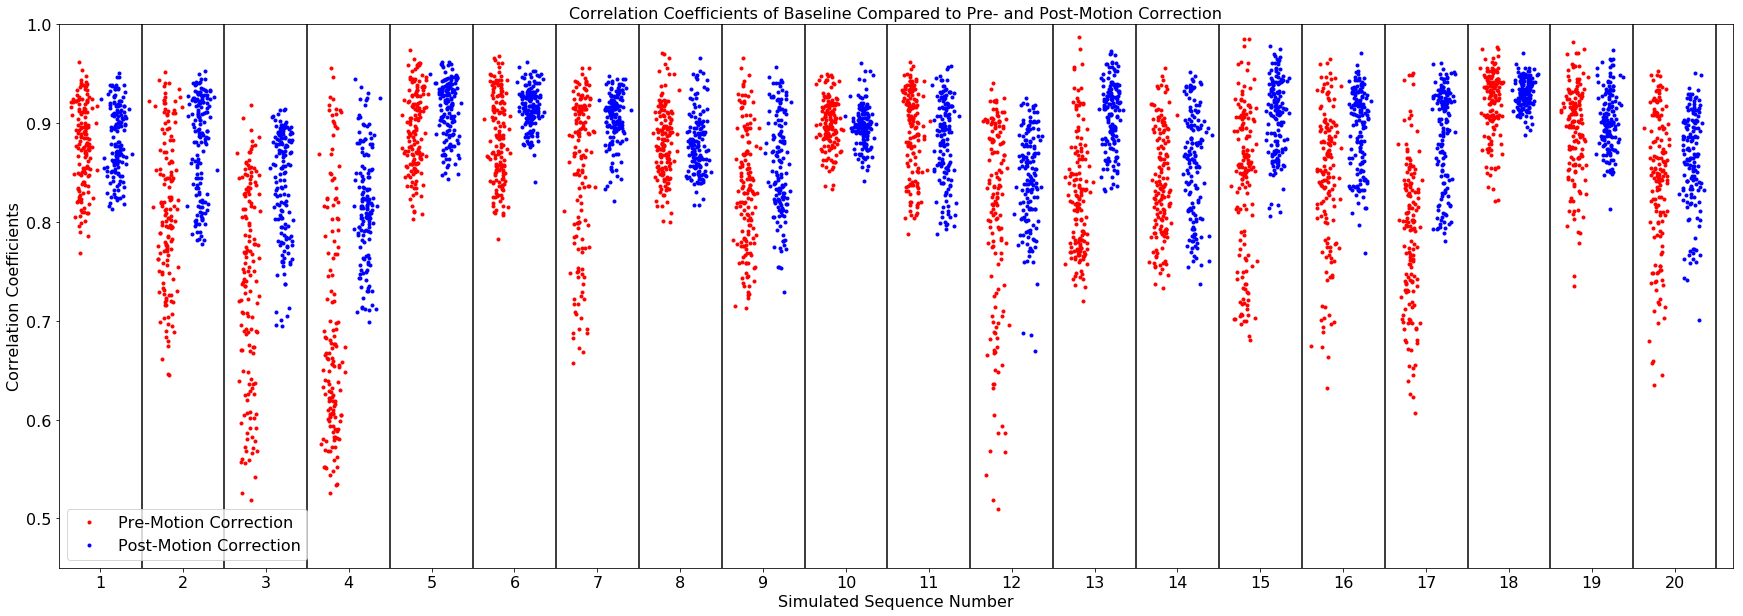

In [58]:
counter = 1
i = 1
plt.figure(figsize=(30,10))
ticks = []
labels = []

for precoRow, postcoRow in zip(nocoDf.iterrows(), mocoDf.iterrows()):
    # Get the data as arrays
    preco = precoRow[1].to_numpy()
    postco = postcoRow[1].to_numpy()
    
    # Specify the x location for each data point
    x1 = np.ones(len(preco))*counter + np.random.normal(scale=0.15, size=len(preco))
    counter = counter + 1
    x2 = np.ones(len(postco))*counter + np.random.normal(scale=0.15, size=len(postco))
    ticks.append(counter-.5)
    counter = counter + 1.5  # .5 gives extra spacing
    
    # Generate the label
    labels.append(str(i))
    i = i + 1
    
    # Plot the scatterplots
    plt.plot(x1, preco, 'r.')
    plt.plot(x2, postco, 'b.')
    
# adding vlines
plt.vlines([i+1.25 for i in ticks], ymin=-1, ymax=2)
    
plt.title("Correlation Coefficients of Baseline Compared to Pre- and Post-Motion Correction")
plt.xticks(ticks, labels)
plt.xlabel("Simulated Sequence Number")
plt.ylabel("Correlation Coefficients")
plt.xlim([.25, 50.75])
plt.ylim([.45, 1.])
plt.legend(["Pre-Motion Correction", "Post-Motion Correction"])
    
plt.savefig("option_2.png")